<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/HW6/DEelectoralHW6_instruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start from your HW5 (or from the solution posted)

The HW5 solution follows. Some of the tasks to are done differently than I would have if I had only the HW5 tasks to do. Those things are outlined below and they are generally in cells of code that need to be finished. The HW6 tasks proper start below ehre it says "**This is where HW2 starts**"

You will need to rerun it and make dure that 
- there are no nan values. Since a lot of the analysis you do relies on population density this will have to be done by **removing areas of 0 population** 
- after you remove precints fix the index by calling ```df_.reset_index(inplace=True)``` on your dataframe so that it does not have missing value. if it did you would be in trouble after creating the weight: you would get a missing index value (I got it for index 274) and also you might have troubles when fitting a line to the Moran's I
- make sure you convert the dataframe to feet (epsg=2263) and work your spatial analysis in feet (there is one point in which I will give you the coordinates of a specific locatoin in lat and lon: you need to either convert those in feet or reconvert temporarily the dataframe to lat-lon to do that part of the analysis)
- make sure you select a single race! the vanilla analysis we did in HW5 could work with summing all the races, but if we want to really look at voters turout, and especially voter turnout by political party and analyze blue and red votes separately, we need to make sure we do not doublecount. I chose the U.S. Senate race. If this were a real project you would need to check if choosing another rate changes your result.

NOTE: I care mostly about the interpretation of the figures in this notebook more than ever! if you cannot get a piece of code to reproduce the figure ask me. I do want you to try (so I want you to ask for it on a step by step basis), but I am happy to show you the solution. I really care about the considerations and interpretation tho!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import scipy as sp
import pylab as plt
import shapely

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 15.0MB/s 
     |████████████████████████████████| 14.8MB 310kB/s 


In [ ]:
!pip install -U --no-deps mapclassify git+git://github.com/geopandas/geopandas.git@master


  Cloning git://github.com/geopandas/geopandas.git (to revision master) to /tmp/pip-req-build-3z7yqn42
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-3z7yqn42
  Created wheel for geopandas: filename=geopandas-0.8.0+53.g7044aa4-py2.py3-none-any.whl size=969259 sha256=01c241e8062c849c8fec13cbbf795e0f735e42efb6bd0d39895032aa21ca4514
  Stored in directory: /tmp/pip-ephem-wheel-cache-7npwmp9b/wheels/1e/57/dc/7a5ea8503aefb23576c42181adfca7fc173fde5b71900660bc
Successfully built geopandas
  Found existing installation: geopandas 0.8.1
    Uninstalling geopandas-0.8.1:
      Successfully uninstalled geopandas-0.8.1


In [ ]:
!apt install libspatialindex-c4v5
!pip install pysal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
0 upgraded, 2 newly installed, 0 to remove and 6 not upgraded.
Need to get 270 kB of archives.
After this operation, 1,107 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Fetched 270 kB in 1s (415 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-c4v5:amd64.
Preparing to un

In [ ]:
import geopandas as gpd

In [ ]:
import pysal as ps

Use the delaware opendata to extract the voting precincts geometries

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv

# read in data

## read in electoral precinct geojson file in geopandas (directly from the URL)

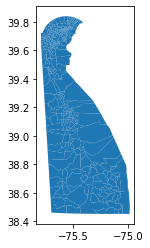

In [ ]:
# leave
de_elecp = gpd.read_file("https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson")
de_elecp.plot();

In [ ]:
# leave
de_elecp.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746..."
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760..."
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686..."
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661..."
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658..."


In [ ]:
# leave
de_elecp.describe()

,OBJECTID,ID,POPULATION
count,430.000000,430.000000,430.000000
mean,215.500000,216.500000,2088.218605
std,124.274562,124.274562,998.347223
min,1.000000,2.000000,0.000000
25%,108.250000,109.250000,1484.750000
50%,215.500000,216.500000,2141.500000
75%,322.750000,323.750000,2659.750000
max,430.000000,431.000000,7734.000000



## read in turnout data - keep only election district, and votes


In [ ]:
# leave
# turnout = pd.read.....
turnout = pd.read_csv("https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv")

In [ ]:
turnout

,county,election_district,office,district,party,candidate,election_day,absentee,votes
0,New Castle,01-01,U.S. Senate,NaN,DEMOCRATIC,Carper T,552,29,581
1,New Castle,01-01,U.S. Senate,NaN,REPUBLICAN,Arlett R,50,1,51
2,New Castle,01-01,U.S. Senate,NaN,GREEN,Theodoropo,5,0,5
3,New Castle,01-01,U.S. Senate,NaN,LIBERTARIN,Frost N,4,2,6
4,New Castle,02-01,U.S. Senate,NaN,DEMOCRATIC,Carper T,903,34,937
...,...,...,...,...,...,...,...,...,...
4719,Sussex,07-41,State Assembly,41.0,REPUBLICAN,Collins R,523,22,545
4720,Sussex,08-41,State Assembly,41.0,DEMOCRATIC,Connor S B,180,11,191
4721,Sussex,08-41,State Assembly,41.0,REPUBLICAN,Collins R,327,8,335
4722,Sussex,Total,State Assembly,41.0,DEMOCRATIC,Connor S B,3172,216,3388


## group by election district and get the total number of data for that district

there are multiple entries for each geometry because there entries indicate the votes per candidate.


In [ ]:
# leave
turnout.groupby(["election_district", "party"]).sum()[["votes"]]

votes
election_district party             
01-01             DEMOCRATIC    2290
                  GREEN            5
                  LIBERTARIN       6
                  REPUBLICAN     218
01-02             DEMOCRATIC    3419
...                              ...
17-02             REPUBLICAN      27
Total             DEMOCRATIC  957201
                  GREEN         4170
                  LIBERTARIN    6669
                  REPUBLICAN  604548

[1748 rows x 1 columns]

## merge the turnout data with the electoral map


In [ ]:
de_elecmap = de_elecp.merge(turnout.groupby("election_district").sum()[["votes"]], 
                            left_on="EDRD_2012", right_index=True, how="left")




In [ ]:
# leave this cell to show
no0votesindx = de_elecmap.POPULATION > 0
de_elecmap = de_elecmap[no0votesindx]
de_elecmap.reset_index(inplace=True)

In [ ]:
# leave this cell to show
# note you have 428 precincts with indices 0-427
de_elecmap

,index,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes
0,0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598.0
1,1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390.0
2,2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690.0
3,3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399.0
4,4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722.0
...,...,...,...,...,...,...,...,...,...
423,425,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451...",4719.0
424,426,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651...",2202.0
425,427,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585...",2086.0
426,428,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804...",1197.0


## make 3 maps: a coropleth of the population by electoral precinct, votes by precinct, and people density. 

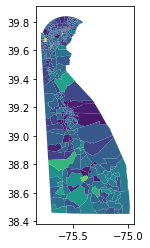

In [ ]:
# leave
# exploratory plot

de_elecmap.plot(column="POPULATION");

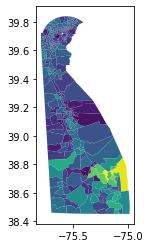

In [ ]:
# leave
# exploratory plot
de_elecmap.plot(column="votes");

In [ ]:
de_elecmap_ft = de_elecmap.to_crs(epsg="2263")
de_elecmap["popdensity"] = (de_elecmap.POPULATION / de_elecmap_ft.geometry.area * 5280 * 5280)


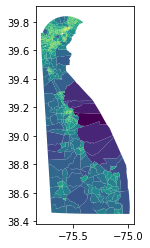

In [ ]:
# leave
de_elecmap.plot(column="popdensity", 
                norm=matplotlib.colors.LogNorm());


## look at the variables' correlation

In [ ]:
# leave
de_elecmap.corr()

,index,OBJECTID,ID,POPULATION,votes,popdensity
index,1.000000,1.000000,0.991604,0.040705,0.181171,-0.353621
OBJECTID,1.000000,1.000000,0.991604,0.040705,0.181171,-0.353621
ID,0.991604,0.991604,1.000000,0.038756,0.180722,-0.353507
POPULATION,0.040705,0.040705,0.038756,1.000000,0.621288,-0.036099
votes,0.181171,0.181171,0.180722,0.621288,1.000000,-0.226415
popdensity,-0.353621,-0.353621,-0.353507,-0.036099,-0.226415,1.000000


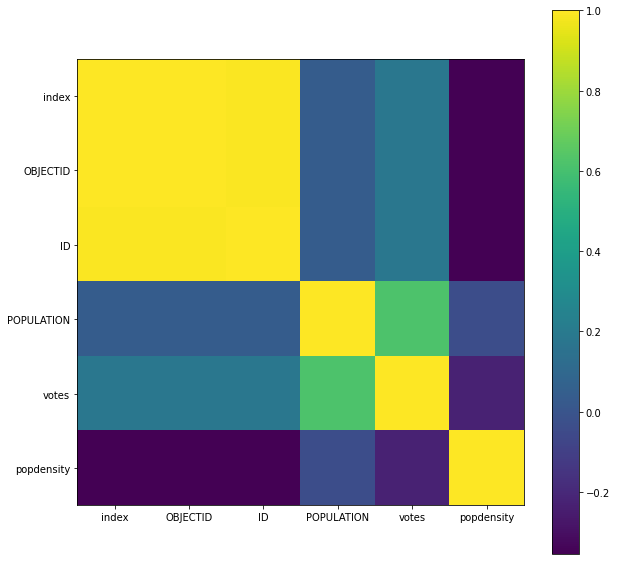

In [ ]:
# leave
# Correlation matrix - we will discuss this kind of plot soon
plt.figure(figsize=(10,10))
plt.imshow(de_elecmap.corr())
plt.xticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.yticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.colorbar();


## fit a line model to the data and a polynomial of second degree. 

# extra credit: set up the problem as a machine leraning problem by splitting the sample into training and test data and evaluating the model on both sets.


In [ ]:
# leave
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# leave
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# leave
X_train, X_test, y_train, y_test = train_test_split(de_elecmap.POPULATION.values, 
                                                    de_elecmap.votes.values, test_size=0.25, 
                                                     random_state=302)
X_train

# or I can do
np.random.seed(302)
inds = np.sort(np.random.choice(de_elecmap.index, 
                                int(de_elecmap.shape[0] * 0.75), replace=False))

In [ ]:
# remove
de_elecmap_train = de_elecmap[["votes", "POPULATION", "popdensity"]].loc[inds].dropna()
de_elecmap_test = de_elecmap[["votes", "POPULATION", "popdensity"]].loc[
  np.array([i for i in de_elecmap.index if not i in inds ])].dropna()

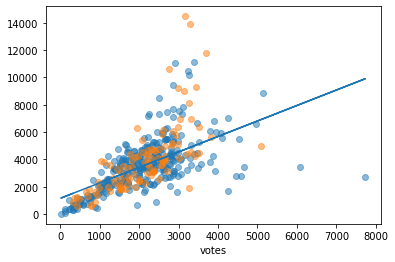

In [ ]:
# remove
# these syntaxes are equivalent
# model1 = sm.OLS(y_train, X_train).fit()
model1 = smf.ols(formula = "votes ~ POPULATION", data=de_elecmap_train).fit()
ypred = model1.predict() 
plt.scatter(de_elecmap_train.POPULATION, de_elecmap_train.votes, alpha=0.5)
plt.scatter(de_elecmap_test.POPULATION, de_elecmap_test.votes, alpha=0.5);
plt.xlabel("population")
plt.xlabel("votes")
plt.plot(de_elecmap_train.POPULATION, ypred);

In [ ]:
# remove
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     194.3
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           8.08e-35
Time:                        14:25:35   Log-Likelihood:                -2799.1
No. Observations:                 321   AIC:                             5602.
Df Residuals:                     319   BIC:                             5610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1149.2646    189.152      6.076      0.000     777.121    1521.408
POPULATION     1.1330      0.081     13.939      0.000       0.973       1.293
==============================================================================
Omnibus:                       58.255   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.468
Skew:                           0.606   Prob(JB):                     4.66e-67
Kurtosis:                       7.623   Cond. No.                     5.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           1.15e-47
Time:                        14:25:35   Log-Likelihood:                -2766.4
No. Observations:                 321   AIC:                             5539.
Df Residuals:                     318   BIC:                             5550.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -315.8743    243.063     -1.300      0.195    -794.088     162.339
I(POPULATION ** 2)    -0.0003   3.44e-05     -8.485      0.000      -0.000      -0.000
POPULATION             2.5891      0.187     13.869      0.000       2.222       2.956
==============================================================================
Omnibus:                       87.408   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.457
Skew:                           1.166   Prob(JB):                     1.55e-65
Kurtosis:                       7.108   Cond. No.                     2.51e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

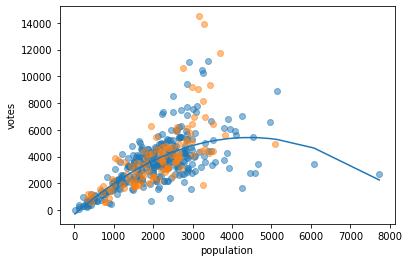

In [ ]:
# remove
model2 = smf.ols(formula = "votes ~ I(POPULATION**2) + POPULATION", data=de_elecmap_train).fit()
ypred = model2.predict(de_elecmap_train.sort_values("POPULATION")) 
plt.scatter(de_elecmap_train.POPULATION, de_elecmap_train.votes, alpha=0.5)
plt.scatter(de_elecmap_test.POPULATION, de_elecmap_test.votes, alpha=0.5);
plt.xlabel("population")
plt.ylabel("votes")
plt.plot(de_elecmap_train.sort_values("POPULATION").POPULATION, ypred);
model2.summary()

If you instead make a model based on population and population density, it is harder to visualize

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           3.17e-52
Time:                        14:25:36   Log-Likelihood:                -3755.0
No. Observations:                 428   AIC:                             7516.
Df Residuals:                     425   BIC:                             7528.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1234.4772    187.128      6.597      0.000     866.666    1602.288
popdensity    -0.0967      0.017     -5.562      0.000      -0.131      -0.063
POPULATION     1.2822      0.077     16.718      0.000       1.131       1.433
==============================================================================
Omnibus:                      139.445   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1210.220
Skew:                           1.133   Prob(JB):                    1.60e-263
Kurtosis:                      10.920   Cond. No.                     1.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

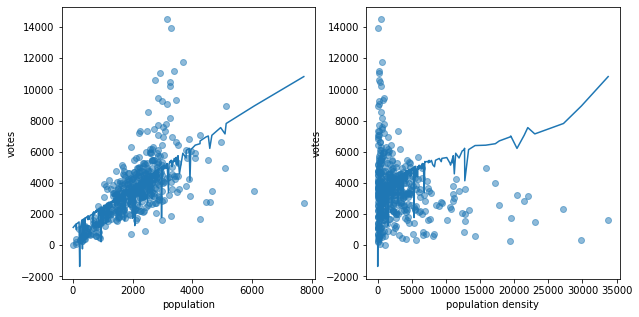

In [ ]:
# remove
model3 = smf.ols(formula = "votes ~ popdensity + POPULATION", data=de_elecmap).fit()
ypred = model3.predict(de_elecmap.sort_values("POPULATION")) 
fig = plt.figure(figsize=(10,5))

fig.add_subplot(121)
plt.scatter(de_elecmap.POPULATION, de_elecmap.votes, alpha=0.5)
plt.xlabel("population")
plt.ylabel("votes")
plt.plot(de_elecmap.sort_values("POPULATION").POPULATION, ypred);

fig.add_subplot(122)
plt.plot(de_elecmap.sort_values("popdensity").popdensity, ypred);
plt.scatter(de_elecmap.popdensity, de_elecmap.votes, alpha=0.5)
plt.xlabel("population density")
plt.ylabel("votes")
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           3.17e-52
Time:                        14:25:36   Log-Likelihood:                -3755.0
No. Observations:                 428   AIC:                             7516.
Df Residuals:                     425   BIC:                             7528.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1234.4772    187.128      6.597      0.000     866.666    1602.288
popdensity    -0.0967      0.017     -5.562      0.000      -0.131      -0.063
POPULATION     1.2822      0.077     16.718      0.000       1.131       1.433
==============================================================================
Omnibus:                      139.445   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1210.220
Skew:                           1.133   Prob(JB):                    1.60e-263
Kurtosis:                      10.920   Cond. No.                     1.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

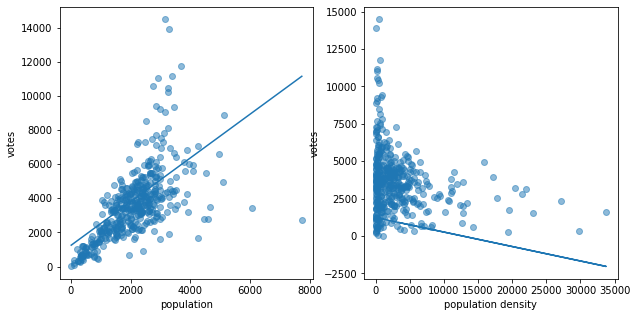

In [ ]:
# remove
fig = plt.figure(figsize=(10,5))

fig.add_subplot(121)
plt.scatter(de_elecmap.POPULATION, de_elecmap.votes, alpha=0.5)
plt.xlabel("population")
plt.ylabel("votes")
plt.plot(de_elecmap.sort_values("POPULATION").POPULATION,
         model3.params[0] + de_elecmap.sort_values("POPULATION").POPULATION * model3.params[2]);

fig.add_subplot(122)
plt.plot(de_elecmap.sort_values("POPULATION").popdensity,
         model3.params[0] + de_elecmap.sort_values("POPULATION").popdensity * model3.params[1]);
plt.scatter(de_elecmap.popdensity, de_elecmap.votes, alpha=0.5)
plt.xlabel("population density")
plt.ylabel("votes")
model3.summary()

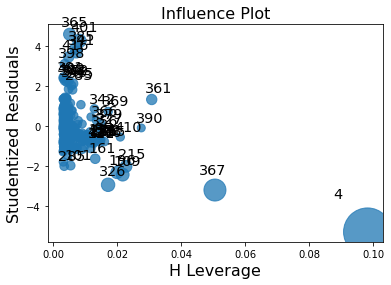

In [ ]:
# remove
sm.graphics.influence_plot(model1);


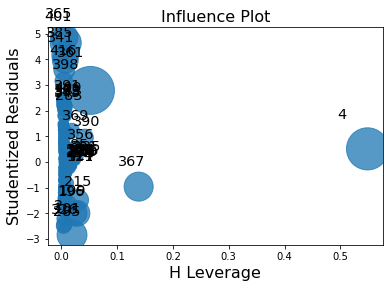

In [ ]:
sm.graphics.influence_plot(model2);


## Compare the models with the Likelihood Ratio test (follow example in class)


In [ ]:
#leave
from sklearn.metrics import r2_score 
# set alpha to 0.05
def printresult(r2, r, alpha=0.1):
  print("conveying {:d}% of the variance in the data and is".format(int(100 *r2)))
  if r < alpha:
    print("better than the first degree polynomial model (p-value {:.2f})".format(r))
  else: 
    print("too complex compared to the first degree polynomial model")

print("\nthe univariate line fit model is conveying {:d}% of the variance in the data".format(
    int(100 * r2_score(de_elecmap_test.dropna().votes, model1.predict(de_elecmap_test.dropna())))))
print("\nthe quadratic model is")
printresult(r2_score(de_elecmap_test.dropna().votes, model2.predict(de_elecmap_test.dropna())),
            model2.compare_lr_test(model1)[1])
print("\nthe multivariate model is")

printresult(r2_score(de_elecmap_test.dropna().votes, model3.predict(de_elecmap_test.dropna())),
            model3.compare_lr_test(model1)[1])



the univariate line fit model is conveying 35% of the variance in the data

the quadratic model is
conveying 39% of the variance in the data and is
better than the first degree polynomial model (p-value 0.00)

the multivariate model is
conveying 45% of the variance in the data and is
too complex compared to the first degree polynomial model


# This is where HW2 starts


## feature engineering
- create a "voterturnout" variable: the number of votes per person.

- create a "red votes" variable: the number of republican votes per person.

- create a "blue votes" variable: the number of democrat votes per person.

plot them as coropleths and comment on what you see

you want all the variable same the same geodataframe

In [ ]:
#leave
# ...
turnout = turnout[turnout.office == "U.S. Senate"]
dems = turnout[turnout.party == "DEMOCRATIC"]
reps = turnout[turnout.party == "REPUBLICAN"]
reps = reps[["votes","election_district"]]
reps.columns = ["reps", "district_reps"]
dems = dems[["votes","election_district"]]
dems.columns = ["dems", "district_dems"]

In [ ]:
dems


,dems,district_dems
0,581,01-01
4,937,02-01
8,541,03-01
12,767,04-01
16,860,05-01
...,...,...
1728,322,06-41
1732,338,07-41
1736,210,08-41
1740,31,16-41


In [ ]:

de_elecmap_ft

,index,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes
0,0,1,20,01-21,1171,21,None,"POLYGON ((512298.901 -148744.869, 512327.758 -...",2598.0
1,1,2,21,01-22,1755,22,None,"POLYGON ((499532.843 -142968.932, 499534.031 -...",4390.0
2,2,3,22,01-23,1947,23,None,"POLYGON ((495603.003 -170059.360, 495596.249 -...",690.0
3,3,4,23,01-24,2828,24,None,"POLYGON ((506531.023 -179405.605, 506499.398 -...",4399.0
4,4,5,24,01-25,7734,25,None,"POLYGON ((491018.486 -180154.129, 491153.174 -...",2722.0
...,...,...,...,...,...,...,...,...,...
423,425,426,424,08-38,2042,38,None,"POLYGON ((662767.289 -623032.929, 662695.364 -...",4719.0
424,426,427,425,08-40,1684,40,None,"POLYGON ((575465.618 -548539.559, 575527.485 -...",2202.0
425,427,428,426,08-41,2785,41,None,"POLYGON ((594371.059 -573129.452, 594435.303 -...",2086.0
426,428,429,427,09-20,414,20,None,"POLYGON ((621404.971 -493701.642, 621379.547 -...",1197.0


In [ ]:

de_elecmap_ft = de_elecmap.merge(dems, left_on="EDRD_2012", right_on = "district_dems")
de_elecmap_ft = de_elecmap_ft.merge(reps, left_on="EDRD_2012", right_on = "district_reps")

In [ ]:
de_elecmap_ft["totalvotes"] = de_elecmap_ft["reps"]+de_elecmap_ft["dems"]
de_elecmap_ft["redvotes"] = de_elecmap_ft["reps"]/de_elecmap_ft["POPULATION"]
de_elecmap_ft["bluevotes"] = de_elecmap_ft["dems"]/de_elecmap_ft["POPULATION"]
de_elecmap_ft["voterturnout"] = de_elecmap_ft["redvotes"]+de_elecmap_ft["bluevotes"]

In [ ]:
de_elecmap_ft

,index,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes,popdensity,dems,district_dems,reps,district_reps,totalvotes,redvotes,bluevotes,voterturnout
0,0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598.0,3051.035117,353,01-21,170,01-21,523,0.145175,0.301452,0.446627
1,1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390.0,1353.325230,671,01-22,411,01-22,1082,0.234188,0.382336,0.616524
2,2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690.0,7024.074253,129,01-23,41,01-23,170,0.021058,0.066256,0.087314
3,3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399.0,2229.844811,582,01-24,278,01-24,860,0.098303,0.205799,0.304102
4,4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722.0,3461.239454,549,01-25,97,01-25,646,0.012542,0.070985,0.083527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,425,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451...",4719.0,178.205539,364,08-38,818,08-38,1182,0.400588,0.178257,0.578844
424,426,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651...",2202.0,131.746087,218,08-40,369,08-40,587,0.219121,0.129454,0.348575
425,427,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585...",2086.0,349.859464,210,08-41,309,08-41,519,0.110952,0.075404,0.186355
426,428,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804...",1197.0,231.350583,80,09-20,163,09-20,243,0.393720,0.193237,0.586957


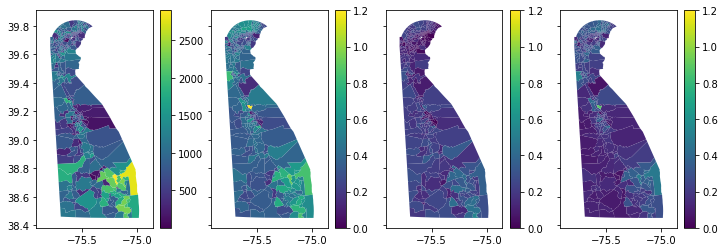

In [ ]:
# plot it all and comment...
# -- make a choropleth
fig, ax = plt.subplots(1, 4, figsize=[12, 4], sharey=True)
ax[0].axis("equal")
ax[1].axis("equal")
ax[2].axis("equal")
ax[3].axis("equal")

de_elecmap_ft.plot(column = "totalvotes", legend=True, ax=ax[0])


de_elecmap_ft.plot(column = "voterturnout", legend=True, vmin = 0, vmax = 1.2, ax=ax[1])


de_elecmap_ft.plot(column = "redvotes", legend=True, vmin = 0, vmax = 1.2, ax=ax[2])


de_elecmap_ft.plot(column = "bluevotes", legend=True, vmin = 0, vmax = 1.2, ax=ax[3])


**"I have a problem to add the title of each plot so i just write it down"**

Figure Caption:From the left to the right, the above maps indicate the number of total votes, the total voter turnout,  the red votes, and the blue votes per electoral precinct, data is sourced from the official Delaware opendata (geospatial data)

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

and USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv


All of the data is selecting US senate race only.

According to the number of total votes, it shows that the water area has the highest value of total votes, which is aligned with the voter turnout. Moreover, we notice that in the map of voter turnout. There is a small yellow area has the highest voter turnout. According to the blue votes map, this small yellow area should be due to the high value of blue votes. Moreover, overall, the blue votes is higher than the red votes. 

# create the rook and queens weights for the DE electoral map geoDF. 

you can do this by saving the df to a file and calling Rook.from_file (like in the class example) 
or you can use .from_iterable(geometry) passing the geometry series from the geoDF
(ask me if you are having a hard time...)

In [ ]:
 de_elecp

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746..."
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760..."
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686..."
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661..."
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658..."
...,...,...,...,...,...,...,...
425,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451..."
426,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651..."
427,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585..."
428,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804..."


In [ ]:
import os
de_elecmap_ft.to_file("de_elecmap.shp")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


In [ ]:

from libpysal.weights import Queen, Rook
path = "de_elecmap.shp"
rook_DE = Rook.from_shapefile(path)
queens_DE = Queen.from_shapefile(path)

In [ ]:
rook_DE.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1

In [ ]:
queens_DE.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0,

## what is the electoral pricincts with most neighbouring ones? is it the same for Rook and Queens weights?

note: you can use the weights object cardinalities attribute, e.g.
```rook_DE.cardinalities```
this will return a dictionary. 
To find the maximum of a dictionary you can look here 
https://www.geeksforgeeks.org/python-get-key-with-maximum-value-in-dictionary/



In [ ]:
RKeymax = max(rook_DE.cardinalities, key=rook_DE.cardinalities.get) 
print(RKeymax)

9


In [ ]:

QKeymax = max(queens_DE.cardinalities, key=queens_DE.cardinalities.get) 
QKeymax

49

In [ ]:
queens_DE.islands

[]

In [ ]:
rook_DE.islands

[]

The the electoral pricincts with most neighbouring ones for Rook weights is 65, the electoral pricincts with most neighbouring ones for Queens weights is 49. Details are printed as below.

In [ ]:
rook_DE.cardinalities[9], rook_DE.weights[9]

(10, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [ ]:
queens_DE.cardinalities[49], queens_DE.weights[49]

(12, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

are there isolated electoral precincts? you can find out with the attribute of the weights "island"


There is no isolated electoral precints.

# challenge: wilmington center has coordinated 39.7447° N, 75.5484° W. 
find out in which precinct this location is (look at the first citibike notebook ) and find how many neighbors that precinct has in booth Rook and Queens weights


 https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html



In [ ]:
from shapely.geometry import Point, Polygon


In [106]:
# combine lat and lon to one column
lonlat = Point(-75.5484, 39.7447)

# Create Point Geometry for based on lonlat column
wilmington = shapely.geometry.Point(lonlat)

In [107]:
wilmingtonpc = de_elecmap.geometry[de_elecmap.geometry.map(lambda geom: wilmington.within(geom))] 

In [108]:
wilmingtonpcid = wilmingtonpc.index.values[0]


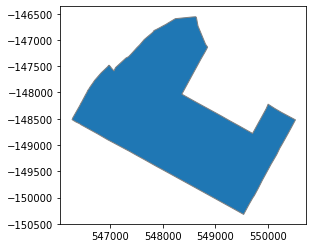

In [109]:
wilmingtonpc.to_crs(epsg=2263).plot(edgecolor='grey')


figure caption: map of the Wilmington center precincts 

## make a connection plot: plot the neighborhood of the Wilmington center precincts and the Rook and Queens weights on it. 


Reproduce the diagram that shows the connectivity of the precints, the "**weights ddiagrams **" (see notebook example https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/SpatialWeights_CitiBike.ipynb) can you see which neighbourhood assignments are different for the rook and the queens weights? can you tell why?


/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:1295: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/usr/local/lib/p

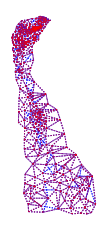

In [112]:
ax = wilmingtonpc.plot(edgecolor='grey', facecolor='w')
f,ax = queens_DE.plot(de_elecmap, ax=ax,
        edge_kws=dict(color='b', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
f,ax = rook_DE.plot(de_elecmap, ax=ax,
        edge_kws=dict(color='r', linestyle=':', alpha=0.5, linewidth=1),
        node_kws=dict(marker=''))


ax.set_axis_off()
# plt.xlim((546000, 551000))

# plt.ylim((-150500, -146500))

**I did not made the map as requested. But according to the citybike notebook. explanation for the difference between queen and rook: the rook can move only to polygons that share a border of some length with its current polygon. ... Thus, rook is a more stringent definition of polygon contiguity than queen—for rook the shared border must be of some length, whereas for queen the shared border can be as small as one point. 

the rook which takes as neighbors any pair of cells that share an edge. Alternatively, the queen criterion is used to include the vertices of the lattice to define contiguous.**

# create the spatial lag metrics and calculate the global Moran's I

In [ ]:
import pysal.lib as ps

In [ ]:
voterturnout = de_elecmap_ft.voterturnout
redvotes = de_elecmap_ft.redvotes
bluevotes = de_elecmap_ft.bluevotes
voterturnoutlag = ps.weights.lag_spatial(queens_DE, voterturnout)
redvoteslag = ps.weights.lag_spatial(queens_DE, redvotes)
bluevoteslag = ps.weights.lag_spatial(queens_DE, bluevotes)

In [ ]:
de_elecmap_ft

,index,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes,popdensity,dems,district_dems,reps,district_reps,totalvotes,redvotes,bluevotes,voterturnout
0,0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598.0,3051.035117,353,01-21,170,01-21,523,0.145175,0.301452,0.446627
1,1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390.0,1353.325230,671,01-22,411,01-22,1082,0.234188,0.382336,0.616524
2,2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690.0,7024.074253,129,01-23,41,01-23,170,0.021058,0.066256,0.087314
3,3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399.0,2229.844811,582,01-24,278,01-24,860,0.098303,0.205799,0.304102
4,4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722.0,3461.239454,549,01-25,97,01-25,646,0.012542,0.070985,0.083527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,425,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451...",4719.0,178.205539,364,08-38,818,08-38,1182,0.400588,0.178257,0.578844
424,426,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651...",2202.0,131.746087,218,08-40,369,08-40,587,0.219121,0.129454,0.348575
425,427,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585...",2086.0,349.859464,210,08-41,309,08-41,519,0.110952,0.075404,0.186355
426,428,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804...",1197.0,231.350583,80,09-20,163,09-20,243,0.393720,0.193237,0.586957


In [ ]:
# leave - just checking
np.where(de_elecmap_ft.voterturnout.isna())

(array([], dtype=int64),)

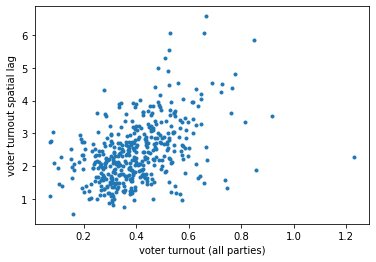

In [ ]:
# leave
plt.plot(de_elecmap_ft.voterturnout, voterturnoutlag, '.')
plt.xlabel("voter turnout (all parties)")
plt.ylabel("voter turnout spatial lag");

according to the plot, it looks there is positive spatial autocorrelation for voter turnout.

In [ ]:
ball, aall = np.polyfit(voterturnout, voterturnoutlag, 1)
br, ar = np.polyfit(redvotes, redvoteslag, 1)
bb, ab = np.polyfit(bluevotes, bluevoteslag, 1)

ball, aall

(2.8655067271792096, 1.2790912748495187)

## following the notebook example in class and the slides make a Moran'sI plot of each:
-all votes

-red votes

-blue votes

what do you notice?


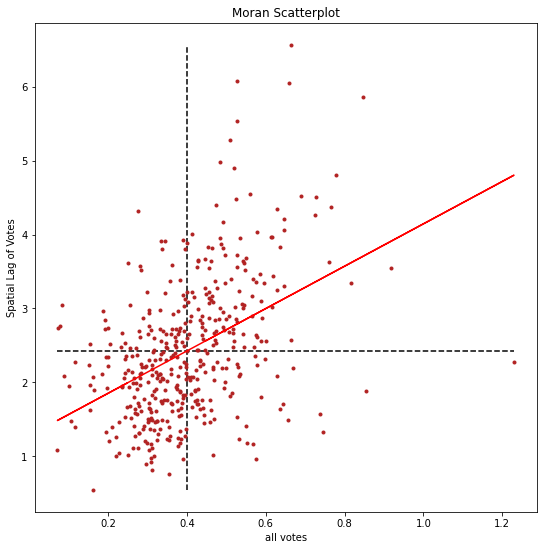

In [ ]:
# i will give you the all voters example, work on the blue and red on your own
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(de_elecmap_ft.voterturnout.values, voterturnoutlag, 
         '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(de_elecmap_ft.voterturnout.values.mean(), 
           voterturnoutlag.min(), 
           voterturnoutlag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(voterturnoutlag.mean(), 
           de_elecmap_ft.voterturnout.values.min(), 
           de_elecmap_ft.voterturnout.values.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(de_elecmap_ft.voterturnout.values, 
         aall + ball * de_elecmap_ft.voterturnout.values, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Votes')
plt.xlabel('all votes');

figure caption: the upper-right quadrant are cases where both the value and local average value of the attribute are higher than the overall average value. Similarly, in the lower-left quadrant are cases where both the value and local average value of the attribute are lower than the overall average value. 
Since most of the points are located in the upper-right quadrant and the lower-left quadrant. The voterturnout case confirm positive spatial autocorrelation.

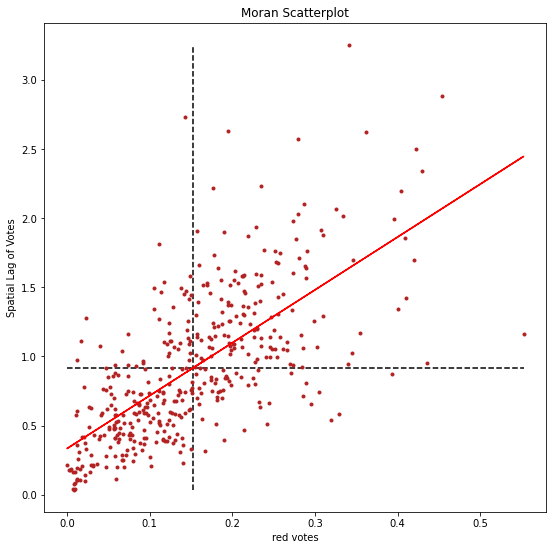

In [88]:
# i will give you the all voters example, work on the blue and red on your own
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(de_elecmap_ft.redvotes.values, redvoteslag, 
         '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(de_elecmap_ft.redvotes.values.mean(), 
           redvoteslag.min(), 
           redvoteslag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(redvoteslag.mean(), 
           de_elecmap_ft.redvotes.values.min(), 
           de_elecmap_ft.redvotes.values.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(de_elecmap_ft.redvotes.values, 
         ar + br * de_elecmap_ft.redvotes.values, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Votes')
plt.xlabel('red votes');

figure caption: the upper-right quadrant are cases where both the value and local average value of the attribute are higher than the overall average value. Similarly, in the lower-left quadrant are cases where both the value and local average value of the attribute are lower than the overall average value. 

Since most of the points are located in the upper-right quadrant and the lower-left quadrant. The red votes case confirm positive spatial autocorrelation.

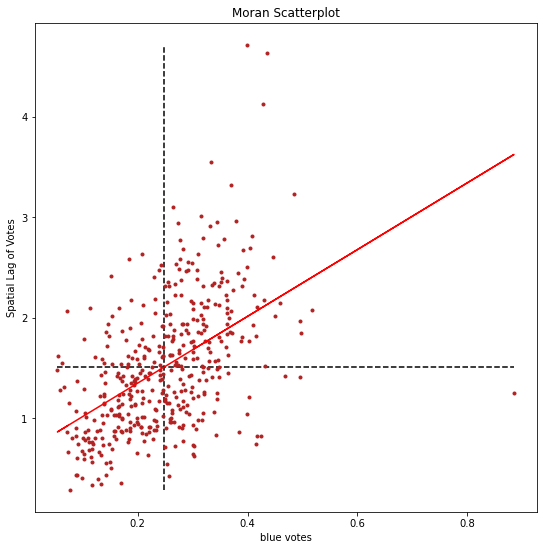

In [90]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(de_elecmap_ft.bluevotes.values, bluevoteslag, 
         '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(de_elecmap_ft.bluevotes.values.mean(), 
           bluevoteslag.min(), 
           bluevoteslag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(bluevoteslag.mean(), 
           de_elecmap_ft.bluevotes.values.min(), 
           de_elecmap_ft.bluevotes.values.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(de_elecmap_ft.bluevotes.values, 
         ab + bb * de_elecmap_ft.bluevotes.values, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Votes')
plt.xlabel('blue votes');

figure caption: the upper-right quadrant are cases where both the value and local average value of the attribute are higher than the overall average value. Similarly, in the lower-left quadrant are cases where both the value and local average value of the attribute are lower than the overall average value.

 Since most of the points are located in the upper-right quadrant and the lower-left quadrant. The blue votes case confirm positive spatial autocorrelation.

# Follow the notebook to complete the *local* spatial analysis. 
# how can you interpret these results ? (we will talk about it in class on Monday too)

In [ ]:
from pysal.explore import esda

In [ ]:
mi1 = esda.Moran(voterturnoutlag, queens_DE)
mi2 = esda.Moran(redvoteslag, queens_DE)
mi3 = esda.Moran(bluevoteslag, queens_DE)


In [ ]:
for v, mi in zip(("all", "red", "blue"), (mi1, mi2, mi3)) :
  print("the global Moran's I for " + 
      "{} is {:.2f}\nwhich corresponds to a p-value of the spatial distribution being random {:.2g}".format(
   v, mi.I, mi.p_sim))

the global Moran's I for all is 0.29
which corresponds to a p-value of the spatial distribution being random 0.001
the global Moran's I for red is 0.67
which corresponds to a p-value of the spatial distribution being random 0.001
the global Moran's I for blue is 0.42
which corresponds to a p-value of the spatial distribution being random 0.001


what does this ^^^ statement actually mean in poorsman words? answer below


In the case of the Spatial Autocorrelation tool, the null hypothesis states that "there is no spatial clustering of the values associated with the geographic features in the study area". When the p-value is small and the absolute value of the Z score is large enough that it falls outside of the desired confidence level, the null hypothsis can be rejected. If the index value is greater than 0, the set of features exhibits a clustered pattern. If the value is less than 0, the set of features exhibits a dispersed pattern.

Thus, according to the value above, it indicates that for voter turnout, red votes, and blue votes, they are all exhibits a clustered pattern and since  they correspond to a p-value of the spatial distribution being random 0.001. It means observed spatial pattern is unlikely the result of random process.

In [ ]:
LMo_red = esda.Moran_Local(de_elecmap_ft.redvotes.values, queens_DE, permutations=9999)


In [ ]:
LMo_blue = esda.Moran_Local(de_elecmap_ft.bluevotes.values, queens_DE, permutations=9999)


In [79]:
sig = LMo_red.p_sim < 0.01
hotspotsR = LMo_red.q==1 * sig
coldspotsR = LMo_red.q==3 * sig
print ("Number of Hotspots:", hotspotsR.sum())
print ("Number of Coldspots:", coldspotsR.sum())

Number of Hotspots: 36
Number of Coldspots: 59


Hotspot analysis is a spatial analysis and mapping technique interested in the identification of clustering of spatial phenomena. These spatial phenomena are depicted as points in a map and refer to locations of events or objects.

Thus, according to the results above, for the red votes, there are 36 hotspot that show the most obvious correlation cluster, and 59 coldpots show the least obvious correlation cluster

In [ ]:
sig = LMo_blue.p_sim < 0.01
hotspotsB = LMo_blue.q==1 * sig
coldspotsB = LMo_blue.q==3 * sig
print ("Number of Hotspots:", hotspotsB.sum())
print ("Number of Coldspots:", coldspotsB.sum())

Number of Hotspots: 35
Number of Coldspots: 49


Thus, according to the results above, for the blue votes, there are 35 hotspot that show the most obvious correlation cluster, and 49 coldpots show the least obvious correlation cluster

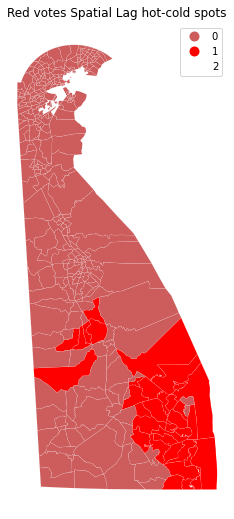

In [ ]:
from matplotlib import colors

hcmap = colors.ListedColormap(['Indianred','red','white'])
hotcold = hotspotsR*1 + coldspotsR*2

f, ax = plt.subplots(figsize=(9, 9))
de_elecmap_ft.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=3, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Red votes Spatial Lag hot-cold spots");

This figure indicates the spatial autocorrelated for the red votes. According to the map, 1 is the most highest spatial autocorrelated that affects neighboring areas and the 2 is the lowest one. Thus, the east-south area of DE has the highest influence to the red votes and the white area in the north of DE has the lowest influence to the red votes.   These results are also corresponded with the red votes coropleths plotted before. 

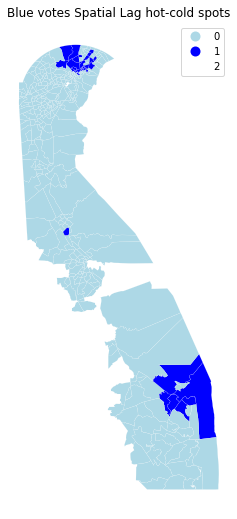

In [ ]:

hcmap = colors.ListedColormap(['lightblue','blue','white'])
hotcold = hotspotsB*1 + coldspotsB*2

f, ax = plt.subplots(figsize=(9, 9))
de_elecmap_ft.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Blue votes Spatial Lag hot-cold spots");

This figure indicates the spatial autocorrelated for the blue votes. According to the map, 1 is the most highest spatial autocorrelated that affects neighboring areas and the 2 is the lowest one. Thus, the east-south area of DE and the dark blue area in north of DE has the highest influence to the blue votes and the white area in the sourth and middle of DE has the lowest influence to the blue votes.  These results are also corresponded with the blue votes coropleths plotted before. 